In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [60]:
def get_coefficients(X,y):
    mean_X=np.mean(X)
    mean_y=np.mean(y)
    num=0
    den=0
    for i in range(len(X)):
        num+=(X[i]-mean_X)*(y[i]-mean_y)
        den+=(X[i]-mean_X)**2
    m=num/den
    c = mean_y - (m * mean_X)
    return m,c

def rSquared(prediction,y_test):
    total_data=len(prediction)
    y_avg=np.sum(y_test)/total_data
    tot_err=np.sum((y_test-y_avg)**2)
    res_err=np.sum((y_test-prediction)**2)
    r2=1-(res_err/tot_err)
    return r2

def mse(pred,y_test):
    return np.square(np.subtract(pred,y_test)).mean()
    
def linear_regression(X_train,X_test,y_train,y_test):
    prediction=[]
    m,c=get_coefficients(X_train,y_train)
    for x in X_test:
        y=m*x+c
        prediction.append(y)
    r2 = rSquared(prediction, y_test)
    mean_sq_err = mse(prediction, y_test)
    print("Coefficient of the equation: ",m)
    print("Intercept: ",c)
    print("The R2 score of the model is: ", r2)
    print("The MSE score of the model is: ", mean_sq_err)
    

In [61]:
df=pd.read_csv(r"C:\Users\TEJKIRAN\Desktop\DataAnalytics_files\student_scores.csv")
X=df['Hours'].values
y=df['Scores'].values
linear_regression(X[:18],X[18:],y[:18],y[18:])

Coefficient of the equation:  9.551474065899415
Intercept:  2.804640285879451
The R2 score of the model is:  0.911727457081383
The MSE score of the model is:  33.060769543723644


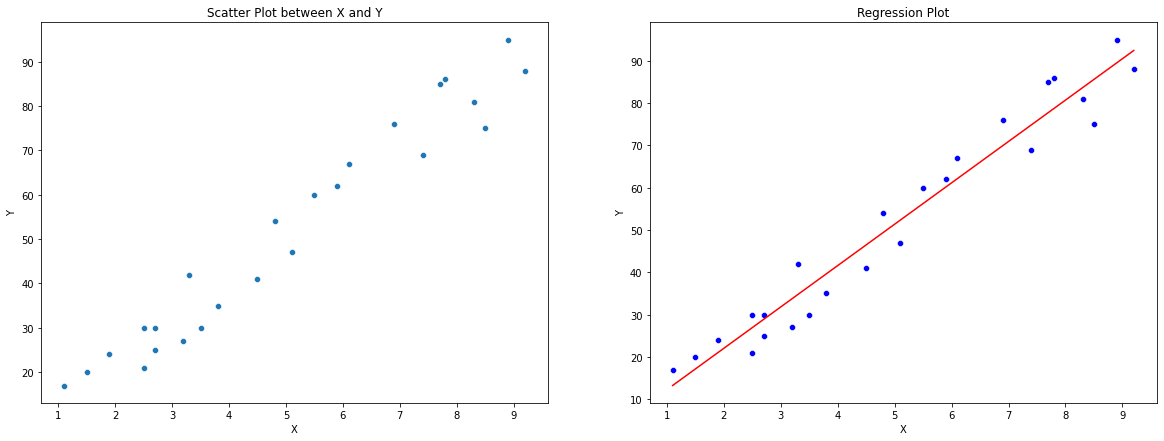

In [62]:
# Visualize
def plot_reg_line(x, y):
    prediction = []
    m, c = get_coefficients(x, y)
    for x0 in x[5:]:
        yhat = m*x0 + c
        prediction.append(yhat)
    
    fig = plt.figure(figsize=(20,7))
    plt.subplot(1,2,1)
    sns.scatterplot(x=x, y=y)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Scatter Plot between X and Y')
    
    plt.subplot(1,2,2)
    sns.scatterplot(x=x, y=y, color = 'blue')
    sns.lineplot(x = [i for i in x[5:]], y = prediction, color='red')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Regression Plot')
    plt.show()
    
plot_reg_line(X, y)

<b>Using Gradient Descent</b>

In [20]:
def rsq(prediction, y_test):
    #
    total_data = len(prediction)
    #Average of total prediction 
    y_avg = np.sum(y_test)/total_data
    #total sum of square error
    tot_err = np.sum((y_test-y_avg)**2)
    #total sum of squared error of residuals
    res_err = np.sum((y_test-prediction)**2)
    #
    r2 = 1 - (res_err / tot_err)
    return r2

In [21]:
def mse_calc(slope, intercept, x_train, y_train):
    tot_error = 0
    pred = []
    for i in range(len(x_train)):
        #calculating total error. It follows the formula y=mx+c
        #m is the slope and c is the intercept
        pred.append(((slope*x_train[i]) + intercept))
        tot_error += (y_train[i] - ((slope*x_train[i]) + intercept)) ** 2
        
    error = tot_error / float(len(x_train))
    return error, pred

In [22]:
#gradient descent 
def grad_descent(s_slope, s_intercept, l_rate, iter_val, x_train, y_train):  
    for i in range(iter_val):
        int_slope = 0
        int_intercept = 0
        n_pt = float(len(x_train))      
        
        for i in range(len(x_train)):
            int_intercept += - (2/n_pt) * (y_train[i] - ((s_slope * x_train[i]) + s_intercept))
            int_slope += - (2/n_pt) * x_train[i] * (y_train[i] - ((s_slope * x_train[i]) + s_intercept))
            
        final_slope = s_slope - (l_rate * int_slope)
        final_intercept = s_intercept - (l_rate * int_intercept)
        s_slope = final_slope
        s_intercept = final_intercept
        
    return  s_slope, s_intercept

Slope of the model 9.678353138921995
Intercept of the model 1.6021171772858003
Error value of the model 34.50691386639317
R squared value 0.919040087383332


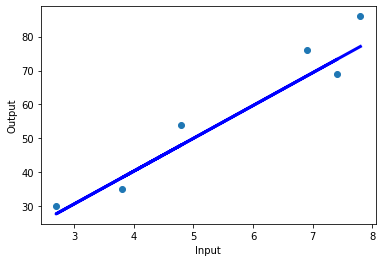

In [30]:
df=pd.read_csv(r"C:\Users\TEJKIRAN\Desktop\DataAnalytics_files\student_scores.csv")
X=df['Hours'].values
y=df['Scores'].values
x_train,x_test,y_train,y_test=X[:19],X[19:],y[:19],y[19:]
#defining slope and intercept value as 0 
learning_rate = 0.0001
start_slope = 0
start_intercept = 0
iteration = 700
#intial run
grad_slope, grad_intercept = grad_descent(start_slope, start_intercept, learning_rate, iteration, x_train, y_train)
# grad_slope=9.551474065899415
# grad_intercept=2.804640285879451
final_e_value, prediction = mse_calc(grad_slope, grad_intercept, x_test, y_test)
#
print('Slope of the model', grad_slope)
print('Intercept of the model', grad_intercept)
print('Error value of the model', final_e_value)
r2_val = rsq(prediction, y_test)
print('R squared value', r2_val)
#Graph
plt.scatter(x_test, y_test)
plt.plot(x_test, prediction, color='blue', linewidth = 3)
plt.xlabel("Input")
plt.ylabel("Output")
plt.show()